# Completion Times Tables

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


# Load the provided CSV file
file_path = '../../cleaned_data/completion_times_cleaned_partial_times_separated.csv'
data = pd.read_csv(file_path)

df=data
# Replace 'CHIRON' with 'SBC'
df['Controller'] = df['Controller'].replace({'CHIRON': 'SBC'})

In [12]:
df

,Folder,Controller,Start_Modality,Task_1,Task_2,Task_3,Task_4,Task_5,Subject,Trial,Modality,Total Time
0,AAHF21-RW-WITH-VR-TRIAL-2-ROSBAG,SBC,WITH-VR,75.644989,48.872307,39.200264,17.848114,30.904282,AAHF21,2,WITH-VR,212.469955
1,AAHF21-RW-WITH-VR-TRIAL-1-ROSBAG,SBC,WITH-VR,165.343307,307.602310,34.984314,27.264221,37.816284,AAHF21,1,WITH-VR,573.010437
2,AAHF21-RW-NO-VR-TRIAL-2-ROSBAG,SBC,WITH-VR,37.954384,44.784332,19.000168,17.976135,20.240181,AAHF21,2,NO-VR,139.955200
3,AAHF21-RW-NO-VR-TRIAL-1-ROSBAG,SBC,WITH-VR,26.210884,28.624367,22.064034,13.376114,18.192238,AAHF21,1,NO-VR,108.467636
4,AAHF21-RW-NO-VR-TRIAL-3-ROSBAG,SBC,WITH-VR,38.964264,41.384285,17.336159,12.672020,16.224594,AAHF21,3,NO-VR,126.581322
...,...,...,...,...,...,...,...,...,...,...,...,...
102,SASD12-RW-NO-VR-TRIAL-2-ROSBAG,WBC,NO-VR,91.417801,63.719894,37.655945,12.304108,24.816162,SASD12,2,NO-VR,229.913910
103,SASD12-RW-WITH-VR-TRIAL-1-ROSBAG,WBC,NO-VR,83.553024,98.992661,48.496201,45.216324,101.504700,SASD12,1,WITH-VR,377.762909
104,SASD12-RW-NO-VR-TRIAL-3-ROSBAG,WBC,NO-VR,80.978241,58.496277,58.080185,44.944183,38.200272,SASD12,3,NO-VR,280.699158
105,SASD12-RW-WITH-VR-TRIAL-2-ROSBAG,WBC,NO-VR,103.480209,114.760712,48.392136,31.728241,96.000732,SASD12,2,WITH-VR,394.362030


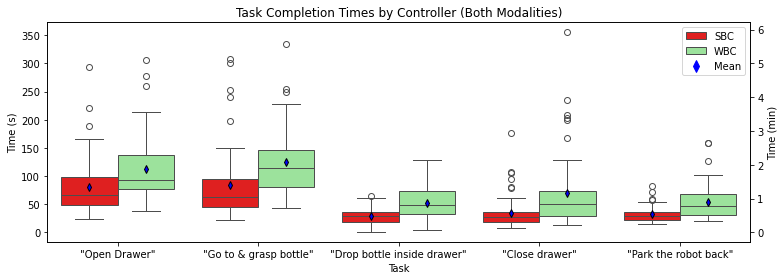

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define custom colors for the controllers
custom_palette = {'SBC': 'red', 'WBC': 'lightgreen'}

# Task names dictionary
task_names = {
    'Task_1': '"Open Drawer"',
    'Task_2': '"Go to & grasp bottle"',
    'Task_3': '"Drop bottle inside drawer"',
    'Task_4': '"Close drawer"',
    'Task_5': '"Park the robot back"',
}


# First plot: All modalities
plt.figure(figsize=(11, 4))

# Boxplot for the primary axis
ax = sns.boxplot(
    data=df.melt(
        id_vars=['Controller', 'Modality'], 
        value_vars=task_names.keys(), 
        var_name='Task', value_name='Time'
    ),
    x='Task', y='Time', hue='Controller', dodge=True, palette=custom_palette,
    showmeans=True, 
    meanprops={'marker': 'd', 'markerfacecolor': 'blue', 'markeredgecolor': 'black', 'markersize': 5}  # Red circle for mean
)

# Title, x and y labels
ax.set_title('Task Completion Times by Controller (Both Modalities)')
ax.set_xlabel('Task')
ax.set_ylabel('Time (s)')
ax.set_xticks(range(len(task_names)))
ax.set_xticklabels(task_names.values(), rotation=0)

# Add the secondary y-axis for minutes
ax2 = ax.twinx()
ax2.set_ylabel('Time (min)')
ax2.set_ylim(ax.get_ylim()[0] / 60, ax.get_ylim()[1] / 60)  # Convert seconds to minutes

# Create a custom legend entry for the mean (red circle)
mean_marker = mlines.Line2D([], [], color='blue', marker='d', linestyle='None', markersize=8, label='Mean')

# Modify the existing legend to include the mean
handles, labels = ax.get_legend_handles_labels()
handles.append(mean_marker)
labels.append('Mean')

ax.legend(handles, labels, loc='upper right')

# Adjust layout
plt.tight_layout()

# Export the plot to a PDF
output_path = "task_completion_times.pdf"  # Specify your desired file path
plt.savefig(output_path, format='pdf')


# Show the plot
plt.show()

In [23]:
# Replace modality values for better readability
data['Modality'] = data['Modality'].replace({'NO-VR': 'Without VR', 'WITH-VR': 'With VR'})

# Calculate statistics: mean, median, standard deviation, and IQR
grouped_updated = data.groupby(['Controller', 'Modality'])
stats_summary_final = grouped_updated['Total Time'].agg(
    Mean='mean',
    Median='median',
    Std='std',
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)
)
# Replace "Std" with the sigma symbol (σ) in the column name
stats_summary_final.rename(columns={'Std': 'σ'}, inplace=True)

# Reset index for better visualization
stats_summary_final.reset_index(inplace=True)
                                
stats_summary_final.sort_values(by='Modality', inplace=True)
                            

# Display the updated table
print(stats_summary_final)

# Export the final table to a CSV file without the index
export_path = 'total_time_chiron_wbc.csv'  # Adjust the path as needed
stats_summary_final.to_csv(export_path, index=False)

# Display the path to the saved file
print(f"The final table has been saved to: {export_path}")

  Controller    Modality        Mean      Median           σ         IQR
0        SBC     With VR  301.122275  270.060486  112.863193  125.724518
2        WBC     With VR  510.980781  509.476929  180.403574  279.231110
1        SBC  Without VR  222.809671  206.772003   91.812563   84.794739
3        WBC  Without VR  321.881736  288.990143  120.666375  147.528259
The final table has been saved to: total_time_chiron_wbc.csv


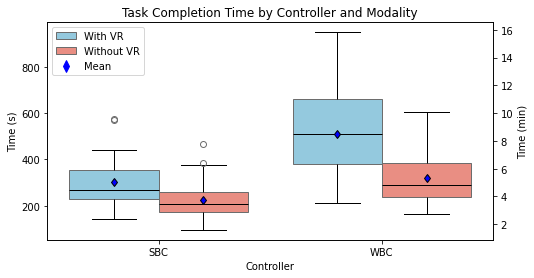

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for the Modality categories
modality_colors = {"With VR": "skyblue", "Without VR": "salmon"}


# Create the boxplot with custom properties
plt.figure(figsize=(8, 4))
ax = sns.boxplot(
    data=df, x='Controller', y='Total Time', hue='Modality', 
    palette=modality_colors, linewidth=1,  # Set thicker black lines
    showmeans=True, 
    meanprops={'marker':'d','markerfacecolor': 'blue','markeredgecolor':'black', 'linewidth': 3}  # Red mean line
)

# Customize boxplot properties (make all outlines black)
for artist in ax.artists:
    artist.set_edgecolor('black')

for line in ax.lines:
    line.set_color('black')

# Title, x and y labels
ax.set_title('Task Completion Time by Controller and Modality')
ax.set_xlabel('Controller')
ax.set_ylabel('Time (s)')

# Add the secondary y-axis for minutes
ax2 = ax.twinx()
ax2.set_ylabel('Time (min)')
ax2.set_ylim(ax.get_ylim()[0] / 60, ax.get_ylim()[1] / 60)  # Convert seconds to minutes

# Create a custom legend entry for the mean (red circle)
mean_marker = mlines.Line2D([], [], color='blue', marker='d', linestyle='None', markersize=8, label='Mean')

# Modify the existing legend to include the mean
handles, labels = ax.get_legend_handles_labels()
handles.append(mean_marker)
labels.append('Mean')

ax.legend(handles, labels, loc='upper left')

# Export the plot to a PDF
output_path = "vr_task_completion_times.png"  # Specify your desired file path
plt.savefig(output_path, format='png')

plt.show()

<ipython-input-33-e4aff5578d9c>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(task_names.values(), rotation=0)
<ipython-input-33-e4aff5578d9c>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(task_names.values(), rotation=0)


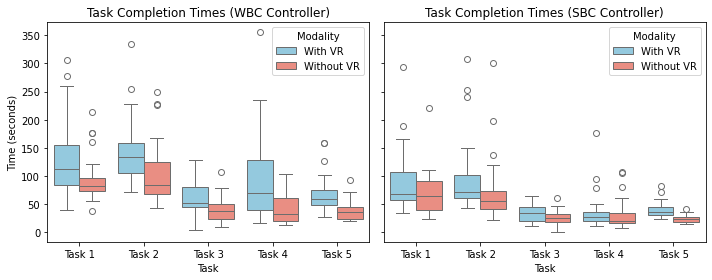

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = data

# Replace 'CHIRON' with 'SBC'
df['Controller'] = df['Controller'].replace({'CHIRON': 'SBC'})

# Rename modality values for better readability
df['Modality'] = df['Modality'].replace({'NO-VR': 'Without VR', 'WITH-VR': 'With VR'})

# Define custom colors for the modalities
modality_palette = {'With VR': 'skyblue', 'Without VR': 'salmon'}

# Task names dictionary
task_names = {
    'Task_1': 'Task 1',
    'Task_2': 'Task 2',
    'Task_3': 'Task 3',
    'Task_4': 'Task 4',
    'Task_5': 'Task 5',
}

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars=['Controller', 'Modality'], 
                     value_vars=task_names.keys(), 
                     var_name='Task', value_name='Time')

# Create plots for WBC and SBC controllers
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot for WBC
wbc_data = df_melted[df_melted['Controller'] == 'WBC']
sns.boxplot(ax=axes[0], data=wbc_data, x='Task', y='Time', hue='Modality', 
            dodge=True, palette=modality_palette)
axes[0].set_title('Task Completion Times (WBC Controller)')
axes[0].set_xlabel('Task')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_xticklabels(task_names.values(), rotation=0)
axes[0].legend(title='Modality')

# Plot for SBC
sbc_data = df_melted[df_melted['Controller'] == 'SBC']
sns.boxplot(ax=axes[1], data=sbc_data, x='Task', y='Time', hue='Modality', 
            dodge=True, palette=modality_palette)
axes[1].set_title('Task Completion Times (SBC Controller)')
axes[1].set_xlabel('Task')
axes[1].set_xticklabels(task_names.values(), rotation=0)
axes[1].legend(title='Modality')

# Adjust layout
plt.tight_layout()

# Export the plot to a PDF
output_path = "task_completion_times_wbc_sbc.pdf"
plt.savefig(output_path, format='pdf')

# Show the plot
plt.show()


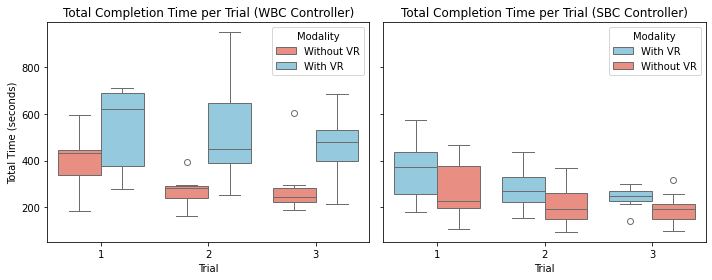

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV file

# Replace 'CHIRON' with 'SBC'
df['Controller'] = df['Controller'].replace({'CHIRON': 'SBC'})

# Rename modality values for better readability
df['Modality'] = df['Modality'].replace({'NO-VR': 'Without VR', 'WITH-VR': 'With VR'})

# Define custom colors for the modalities
modality_palette = {'With VR': 'skyblue', 'Without VR': 'salmon'}

# Create plots for WBC and SBC controllers
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot for WBC
wbc_data = df[df['Controller'] == 'WBC']
sns.boxplot(ax=axes[0], data=wbc_data, x='Trial', y='Total Time', hue='Modality', 
            dodge=True, palette=modality_palette)
axes[0].set_title('Total Completion Time per Trial (WBC Controller)')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('Total Time (seconds)')
axes[0].legend(title='Modality')

# Plot for SBC
sbc_data = df[df['Controller'] == 'SBC']
sns.boxplot(ax=axes[1], data=sbc_data, x='Trial', y='Total Time', hue='Modality', 
            dodge=True, palette=modality_palette)
axes[1].set_title('Total Completion Time per Trial (SBC Controller)')
axes[1].set_xlabel('Trial')
axes[1].legend(title='Modality')

# Adjust layout
plt.tight_layout()

# Export the plot to a PDF
output_path = "total_completion_time_wbc_sbc.pdf"
plt.savefig(output_path, format='pdf')

# Show the plot
plt.show()


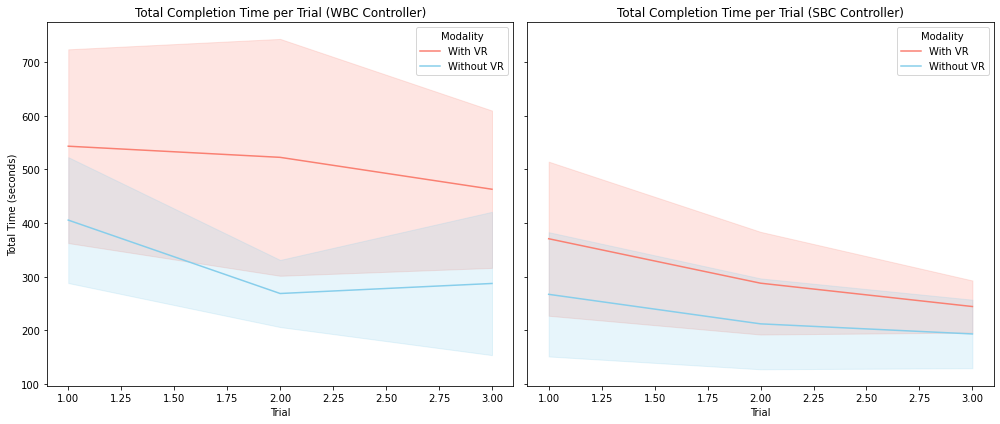

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Replace 'CHIRON' with 'SBC'
df['Controller'] = df['Controller'].replace({'CHIRON': 'SBC'})

# Rename modality values for better readability
df['Modality'] = df['Modality'].replace({'NO-VR': 'Without VR', 'WITH-VR': 'With VR'})

# Define custom colors for the modalities
modality_palette = {'With VR': 'salmon', 'Without VR': 'skyblue'}

# Create plots for WBC and SBC controllers
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group data for standard deviation
wbc_grouped = df[df['Controller'] == 'WBC'].groupby(['Trial', 'Modality'])['Total Time']
sbc_grouped = df[df['Controller'] == 'SBC'].groupby(['Trial', 'Modality'])['Total Time']

# Compute mean and std deviation
wbc_mean = wbc_grouped.mean().unstack()
wbc_std = wbc_grouped.std().unstack()
sbc_mean = sbc_grouped.mean().unstack()
sbc_std = sbc_grouped.std().unstack()

# Plot for WBC
for modality in wbc_mean.columns:
    axes[0].plot(wbc_mean.index, wbc_mean[modality], label=modality, color=modality_palette[modality])
    axes[0].fill_between(wbc_mean.index, wbc_mean[modality] - wbc_std[modality], wbc_mean[modality] + wbc_std[modality], 
                         alpha=0.2, color=modality_palette[modality])
axes[0].set_title('Total Completion Time per Trial (WBC Controller)')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('Total Time (seconds)')
axes[0].legend(title='Modality')

# Plot for SBC
for modality in sbc_mean.columns:
    axes[1].plot(sbc_mean.index, sbc_mean[modality], label=modality, color=modality_palette[modality])
    axes[1].fill_between(sbc_mean.index, sbc_mean[modality] - sbc_std[modality], sbc_mean[modality] + sbc_std[modality], 
                         alpha=0.2, color=modality_palette[modality])
axes[1].set_title('Total Completion Time per Trial (SBC Controller)')
axes[1].set_xlabel('Trial')
axes[1].legend(title='Modality')

# Adjust layout
plt.tight_layout()

# Export the plot to a PDF
output_path = "total_completion_time_wbc_sbc.pdf"
plt.savefig(output_path, format='pdf')

# Show the plot
plt.show()


In [43]:
import pandas as pd



# Compute statistics for total completion times
stats = []
for controller in ['WBC', 'SBC']:
    for modality in ['With VR', 'Without VR']:
        subset = df[(df['Controller'] == controller) & (df['Modality'] == modality)]
        mean = subset['Total Time'].mean()
        std = subset['Total Time'].std()
        median = subset['Total Time'].median()
        min_val = subset['Total Time'].min()
        max_val = subset['Total Time'].max()
        stats.append([controller, modality, mean, std, median, min_val, max_val])

# Convert to DataFrame
stats_df = pd.DataFrame(stats, columns=['Controller', 'Modality', 'Mean', 'Std Dev', 'Median', 'Min', 'Max'])

# Generate LaTeX table
latex_code = stats_df.to_latex(index=False, float_format="%.2f", caption="Total Completion Time Statistics", label="tab:total_completion_stats")

# Save LaTeX table to a file
with open("total_completion_time_stats.tex", "w") as f:
    f.write(latex_code)

# Display table output
print(latex_code)


\begin{table}
\caption{Total Completion Time Statistics}
\label{tab:total_completion_stats}
\begin{tabular}{llrrrrr}
\toprule
Controller & Modality & Mean & Std Dev & Median & Min & Max \\
\midrule
WBC & With VR & 510.98 & 180.40 & 509.48 & 213.33 & 949.41 \\
WBC & Without VR & 321.88 & 120.67 & 288.99 & 164.55 & 605.78 \\
SBC & With VR & 301.12 & 112.86 & 270.06 & 142.72 & 573.01 \\
SBC & Without VR & 222.81 & 91.81 & 206.77 & 95.48 & 467.90 \\
\bottomrule
\end{tabular}
\end{table}

